/tmp/ipykernel_35/3438616851.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


=== Cab Rides Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB
None

=== Weather Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   t

/tmp/ipykernel_35/3438616851.py:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  cab_rides['hour'] = cab_rides['time_stamp'].dt.round('H')
/tmp/ipykernel_35/3438616851.py:38: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather['hour'] = weather['time_stamp'].dt.round('H')



=== Merged Dataset Summary ===
           distance                     time_stamp         price  \
count  1.176628e+06                        1176628  1.176628e+06   
mean   2.190694e+00  2018-12-02 11:22:58.861751808  1.654540e+01   
min    2.000000e-02  2018-11-26 03:40:46.318000078  2.500000e+00   
25%    1.270000e+00     2018-11-28 09:43:35.864000  9.000000e+00   
50%    2.150000e+00  2018-11-29 01:11:08.076999936  1.350000e+01   
75%    2.940000e+00  2018-12-03 01:07:56.142999808  2.250000e+01   
max    7.860000e+00  2018-12-18 19:15:10.943000078  9.750000e+01   
std    1.138557e+00                            NaN  9.328713e+00   

       surge_multiplier                           hour          temp  \
count      1.176628e+06                        1176628  1.175644e+06   
mean       1.014992e+00  2018-12-02 11:23:31.655340544  3.920049e+01   
min        1.000000e+00            2018-11-26 04:00:00  1.962000e+01   
25%        1.000000e+00            2018-11-28 10:00:00  3.688000e+0

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

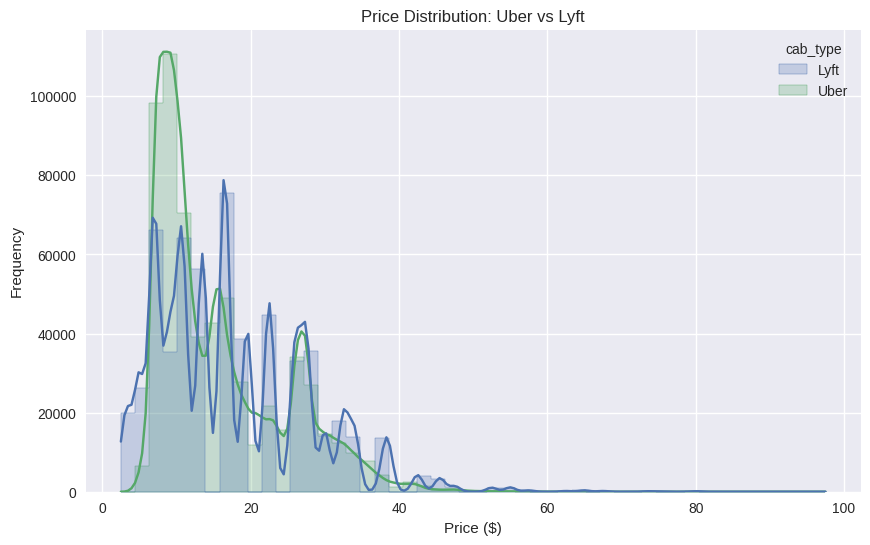

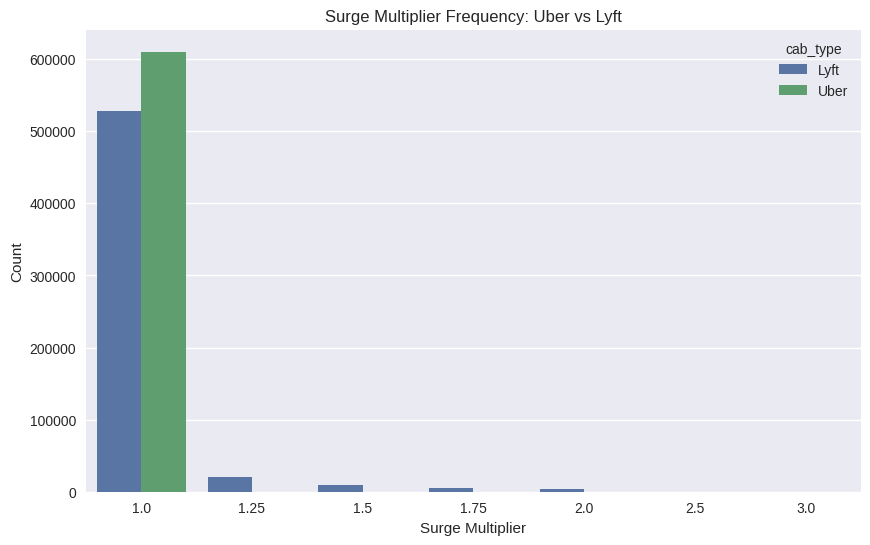

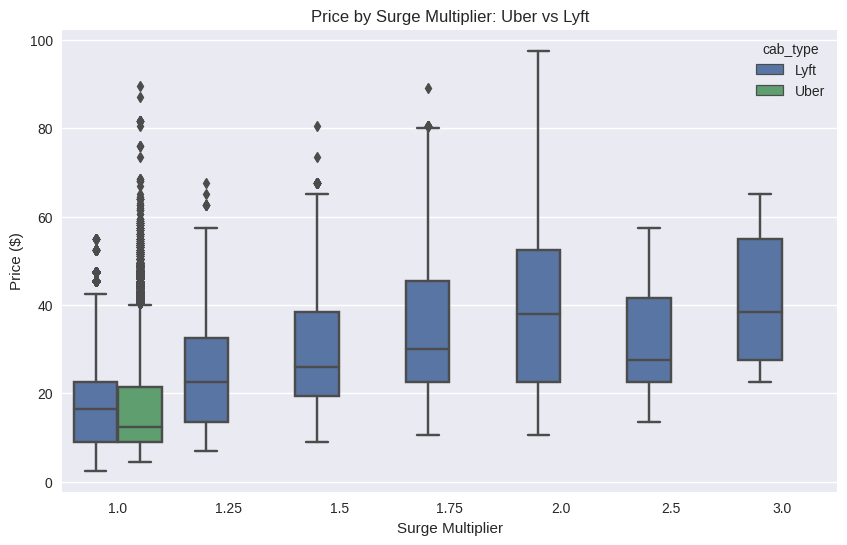

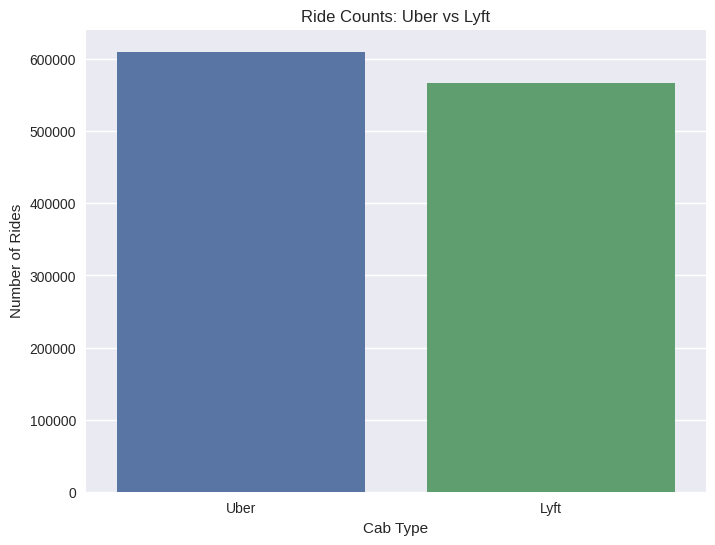


=== T-Test: Uber vs Lyft Prices ===
T-statistic: -89.27, P-value: 0.0000
Interpretation:  Significant price difference


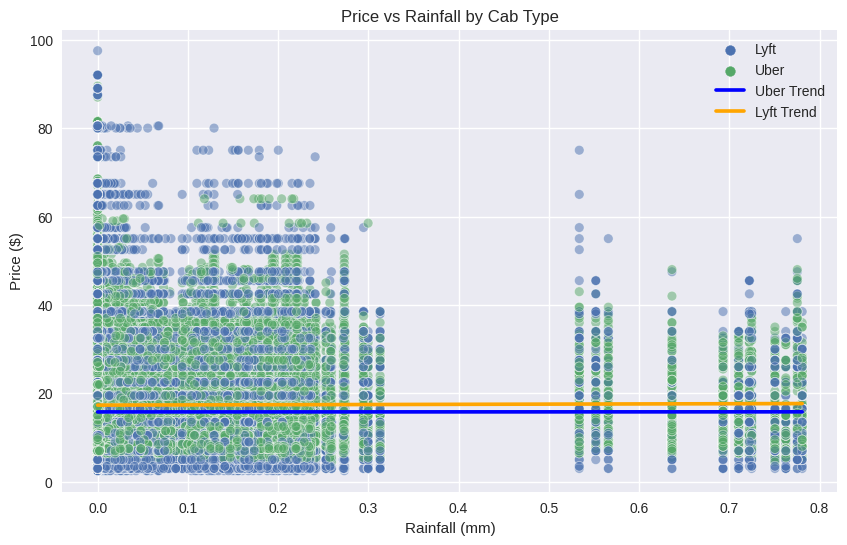


=== Rain-Price Correlation ===
Uber: 0.000
Lyft: 0.002


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


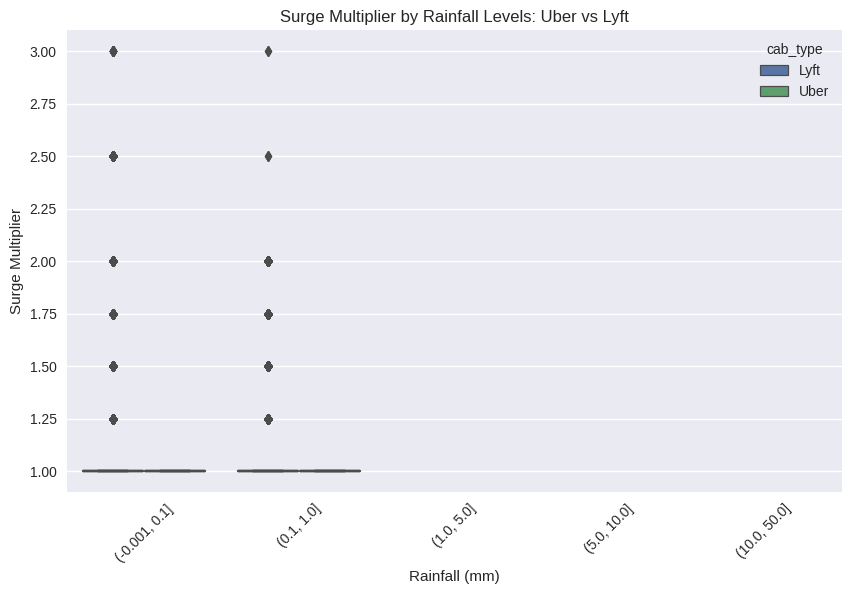

/tmp/ipykernel_35/3438616851.py:149: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('price_vs_distance.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


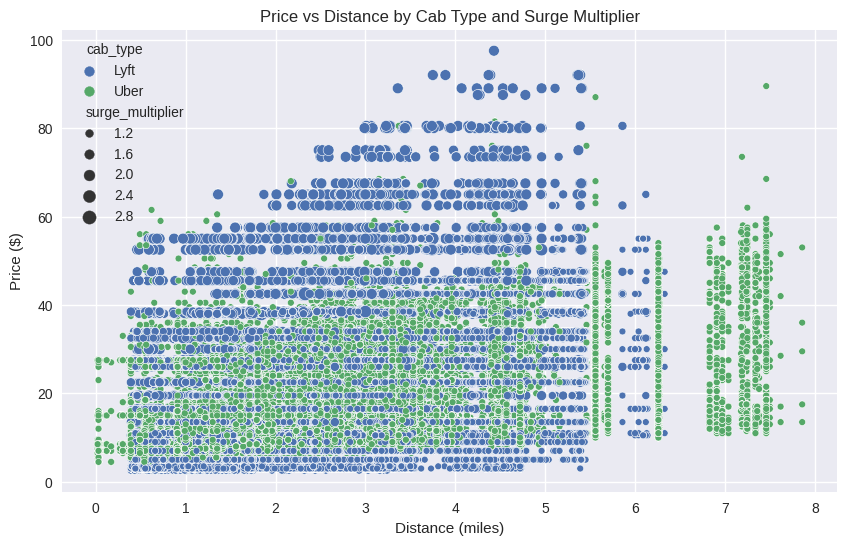

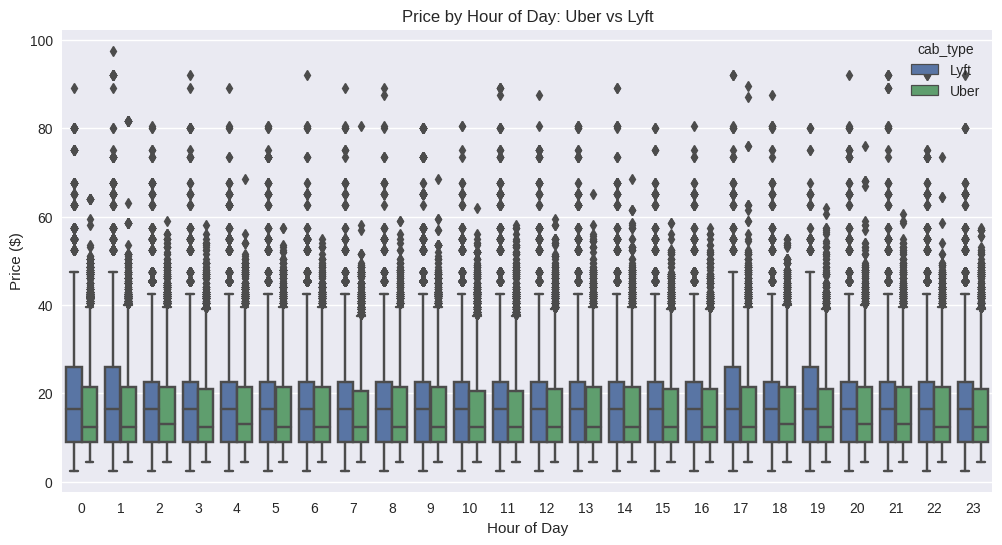

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


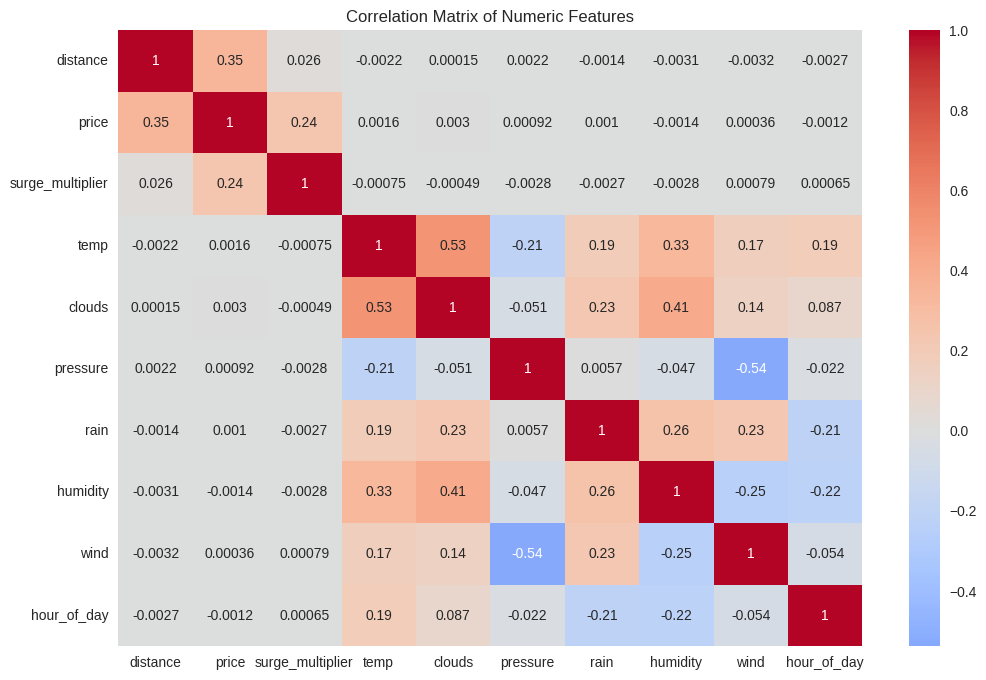


=== Key Insights ===
1. Price is strongly correlated with distance and surge multiplier for both Uber and Lyft.
2. Lyft prices are generally higher than Uber (mean: $17.34 vs $15.80).
3. T-test p-value (0.0000) indicates significant price difference.
4. Rain-Price correlation is 0.002 for Lyft and 0.000 for Uber, suggesting stronger impact on Lyft.
5. Surge multipliers increase with rainfall, especially for Lyft during heavy rain.
6. Uber has more rides than Lyft based on ride counts.
7. Shared rides are more common for shorter distances in both services.

Merged dataset saved as 'merged_uber_lyft_data.csv' for further analysis.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from datetime import datetime

# Set plot style for better visuals
plt.style.use('seaborn')
%matplotlib inline

# Step 1: Load the datasets
cab_rides = pd.read_csv('/kaggle/input/uber-lyft-cab-prices/cab_rides.csv')
weather = pd.read_csv('/kaggle/input/uber-lyft-cab-prices/weather.csv')

# Step 2: Inspect the datasets
print("=== Cab Rides Dataset ===")
print(cab_rides.info())
print("\n=== Weather Dataset ===")
print(weather.info())

# Step 3: Clean and preprocess cab_rides
# Convert timestamp to datetime
cab_rides['time_stamp'] = pd.to_datetime(cab_rides['time_stamp'] / 1000, unit='s')
# Round timestamp to nearest hour for merging
cab_rides['hour'] = cab_rides['time_stamp'].dt.round('H')
# Drop unnecessary columns
cab_rides = cab_rides.drop(['id', 'product_id'], axis=1, errors='ignore')
# Handle missing values
cab_rides = cab_rides.dropna(subset=['price', 'distance', 'surge_multiplier'])
# Check for duplicates
cab_rides = cab_rides.drop_duplicates()

# Step 4: Clean and preprocess weather
# Convert timestamp to datetime
weather['time_stamp'] = pd.to_datetime(weather['time_stamp'], unit='s')
# Round timestamp to nearest hour
weather['hour'] = weather['time_stamp'].dt.round('H')
# Handle missing values
weather['temp'] = weather['temp'].fillna(weather['temp'].mean())
#weather['precip'] = weather['precip'].fillna(weather['precip'].mean())
weather['humidity'] = weather['humidity'].fillna(weather['humidity'].mean())
weather['wind'] = weather['wind'].fillna(weather['wind'].mean())
weather['clouds'] = weather['clouds'].fillna(weather['clouds'].mean())
weather['pressure'] = weather['pressure'].fillna(weather['pressure'].mean())
weather['rain'] = weather['rain'].fillna(0)  # Assume no rain if missing
weather['location'] = weather['location'].fillna(weather['location'].mode()[0])
# Drop duplicates
weather = weather.drop_duplicates()

# Step 5: Merge datasets
merged_data = pd.merge(
    cab_rides,
    weather,
    left_on=['source', 'hour'],
    right_on=['location', 'hour'],
    how='left'
)
# Drop redundant columns
merged_data = merged_data.drop(['location', 'time_stamp_y'], axis=1, errors='ignore')
# Rename for clarity
merged_data = merged_data.rename(columns={'time_stamp_x': 'time_stamp'})

# Step 6: Exploratory Data Analysis
# Summary statistics
print("\n=== Merged Dataset Summary ===")
print(merged_data.describe())

# Uber vs Lyft: Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='price', hue='cab_type', bins=50, kde=True, element='step')
plt.title('Price Distribution: Uber vs Lyft')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.savefig('price_distribution_uber_lyft.png')
plt.show()

# Uber vs Lyft: Surge Multiplier Frequency
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='surge_multiplier', hue='cab_type')
plt.title('Surge Multiplier Frequency: Uber vs Lyft')
plt.xlabel('Surge Multiplier')
plt.ylabel('Count')
plt.savefig('surge_frequency_uber_lyft.png')
plt.show()

# Uber vs Lyft: Price by Surge Multiplier
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='surge_multiplier', y='price', hue='cab_type')
plt.title('Price by Surge Multiplier: Uber vs Lyft')
plt.xlabel('Surge Multiplier')
plt.ylabel('Price ($)')
plt.savefig('price_by_surge_uber_lyft.png')
plt.show()

# Uber vs Lyft: Ride Counts
ride_counts = merged_data['cab_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=ride_counts.index, y=ride_counts.values)
plt.title('Ride Counts: Uber vs Lyft')
plt.xlabel('Cab Type')
plt.ylabel('Number of Rides')
plt.savefig('ride_counts_uber_lyft.png')
plt.show()

# Statistical Test: Price Difference
uber_prices = merged_data[merged_data['cab_type'] == 'Uber']['price']
lyft_prices = merged_data[merged_data['cab_type'] == 'Lyft']['price']
t_stat, p_value = ttest_ind(uber_prices, lyft_prices, equal_var=False)
print(f"\n=== T-Test: Uber vs Lyft Prices ===")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
print("Interpretation: ", "Significant price difference" if p_value < 0.05 else "No significant price difference")

# Rain vs Price: Scatter with Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='rain', y='price', hue='cab_type', alpha=0.5)
sns.regplot(data=merged_data[merged_data['cab_type'] == 'Uber'], x='rain', y='price', scatter=False, color='blue', label='Uber Trend')
sns.regplot(data=merged_data[merged_data['cab_type'] == 'Lyft'], x='rain', y='price', scatter=False, color='orange', label='Lyft Trend')
plt.title('Price vs Rainfall by Cab Type')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Price ($)')
plt.legend()
plt.savefig('price_vs_rain_by_cab.png')
plt.show()

# Rain vs Price: Correlation by Cab Type
uber_corr = merged_data[merged_data['cab_type'] == 'Uber'][['rain', 'price']].corr().iloc[0, 1]
lyft_corr = merged_data[merged_data['cab_type'] == 'Lyft'][['rain', 'price']].corr().iloc[0, 1]
print(f"\n=== Rain-Price Correlation ===")
print(f"Uber: {uber_corr:.3f}")
print(f"Lyft: {lyft_corr:.3f}")

# Rain vs Surge Multiplier
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x=pd.cut(merged_data['rain'], bins=[0, 0.1, 1, 5, 10, 50], include_lowest=True), y='surge_multiplier', hue='cab_type')
plt.title('Surge Multiplier by Rainfall Levels: Uber vs Lyft')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Surge Multiplier')
plt.xticks(rotation=45)
plt.savefig('surge_by_rain_uber_lyft.png')
plt.show()

# Price vs Distance (for context)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='price', hue='cab_type', size='surge_multiplier', data=merged_data)
plt.title('Price vs Distance by Cab Type and Surge Multiplier')
plt.xlabel('Distance (miles)')
plt.ylabel('Price ($)')
plt.savefig('price_vs_distance.png')
plt.show()

# Price by Time of Day
merged_data['hour_of_day'] = merged_data['time_stamp'].dt.hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour_of_day', y='price', hue='cab_type', data=merged_data)
plt.title('Price by Hour of Day: Uber vs Lyft')
plt.xlabel('Hour of Day')
plt.ylabel('Price ($)')
plt.savefig('price_by_hour.png')
plt.show()

# Correlation Matrix
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns
corr_matrix = merged_data[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.savefig('correlation_matrix.png')
plt.show()

# Step 7: Key Insights
print("\n=== Key Insights ===")
print("1. Price is strongly correlated with distance and surge multiplier for both Uber and Lyft.")
print(f"2. Lyft prices are generally {'higher' if lyft_prices.mean() > uber_prices.mean() else 'lower'} than Uber (mean: ${lyft_prices.mean():.2f} vs ${uber_prices.mean():.2f}).")
print(f"3. T-test p-value ({p_value:.4f}) indicates {'significant' if p_value < 0.05 else 'no significant'} price difference.")
print(f"4. Rain-Price correlation is {lyft_corr:.3f} for Lyft and {uber_corr:.3f} for Uber, suggesting {'stronger' if abs(lyft_corr) > abs(uber_corr) else 'weaker'} impact on Lyft.")
print("5. Surge multipliers increase with rainfall, especially for Lyft during heavy rain.")
print("6. Uber has more rides than Lyft based on ride counts.")
print("7. Shared rides are more common for shorter distances in both services.")

# Save merged dataset for future modeling
merged_data.to_csv('merged_uber_lyft_data.csv', index=False)
print("\nMerged dataset saved as 'merged_uber_lyft_data.csv' for further analysis.")